# Random Inference

Typically in statistics we are taught about the null hypothesis (i.e., that the avg. treatment effect of the treatment group is no different than the control group). Here avg. is emphasized. However, the lesser known sharp null hypothesis is very powerful. The sharp null states that there is no difference between each individuals treatment and control potential outcomes, rather than the average group effect. What is great about this is that if we have properly randomized our groups we can assume that the potential outcome for each idividual that we observe is the exact same as the counterfactual outcome that we did not observe (i.e, one's treatment outcome will be exactly the same as their control and visa versa). What does that let us do? It allows us to randomly shuffle participants in an experiment and reassign them to treatment or control and use our observed potential outcome as the outcomes for this new hypothetical experiment. We can repeat this thousands of times to get the sampling distribution of expected outcomes. With this we can then measure (P-value) how likely we were to observe our original observed potential outcomes under this sharp null hypothesis.

In [30]:
#Simulate an experiment with no effect
#does eating candy for bfast increase cavitites

#two groups of 20
group <- c(rep("Candy",20),rep("No Candy",20))

#create two identical vectors, one for control outcomes
#and one for treatmeant outcomes, bc in our contrived 
#universe we are saying there is 0 difference btw the two
#among the 40 people 10 people each have 1,4,10 and 20
#cavities
potential_outcome_control <- c(rep(1,10), rep(4,10), rep(10,10), rep(20,10))
potential_outcome_treatment <- c(rep(1,10), rep(4,10), rep(10,10), rep(20,10))
potential_outcome_control
potential_outcome_treatment


[1]  1  1  1  1  1  1  1  1  1  1  4  4  4  4  4  4  4  4  4  4 10 10 10 10 10
[26] 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20

[1]  1  1  1  1  1  1  1  1  1  1  4  4  4  4  4  4  4  4  4  4 10 10 10 10 10
[26] 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20

In [31]:
#Function to randomly assign units to treatment and control
randomize <- function() sample(c(rep(0,20),rep(1,20)))
treatment <- randomize() #Conduct randomization for this experiment
treatment

[1] 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1
[39] 1 0

In [32]:
#Get vector of outcomes for those in treatment
#vs control based on random treatment assignment
#hint:it will be identical to original potential
#outcome vectors
outcomes <- potential_outcome_treatment * treatment + potential_outcome_control * (1-treatment)
outcomes

[1]  1  1  1  1  1  1  1  1  1  1  4  4  4  4  4  4  4  4  4  4 10 10 10 10 10
[26] 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20

In [33]:
#Function to estimate the average treatment effect
#We still use mean treatment w/sharp null. It's the
#belief that there is no difference btw treatment and
#control that allows us to rerun the experiment over
#and over in the next couple steps
est.ate <- function(outcome, treat) mean(outcome[treat==1]) -
mean(outcome[treat==0])
ate <- est.ate(outcomes, treatment) #Compute the average treatment effect for this experiment
ate

[1] 2.9

In [34]:
#Why are we seeing a difference!?!?, despite there being no effect!
#We know there is no effect bc we created this universe
#How big is that difference likely to be on average?
#We can simulate this a few times to get a sense of how much our
#treatment effect estimate would vary by chance
est.ate(outcomes, randomize())
est.ate(outcomes, randomize())
est.ate(outcomes, randomize())

[1] 2

[1] 1.5

[1] -1

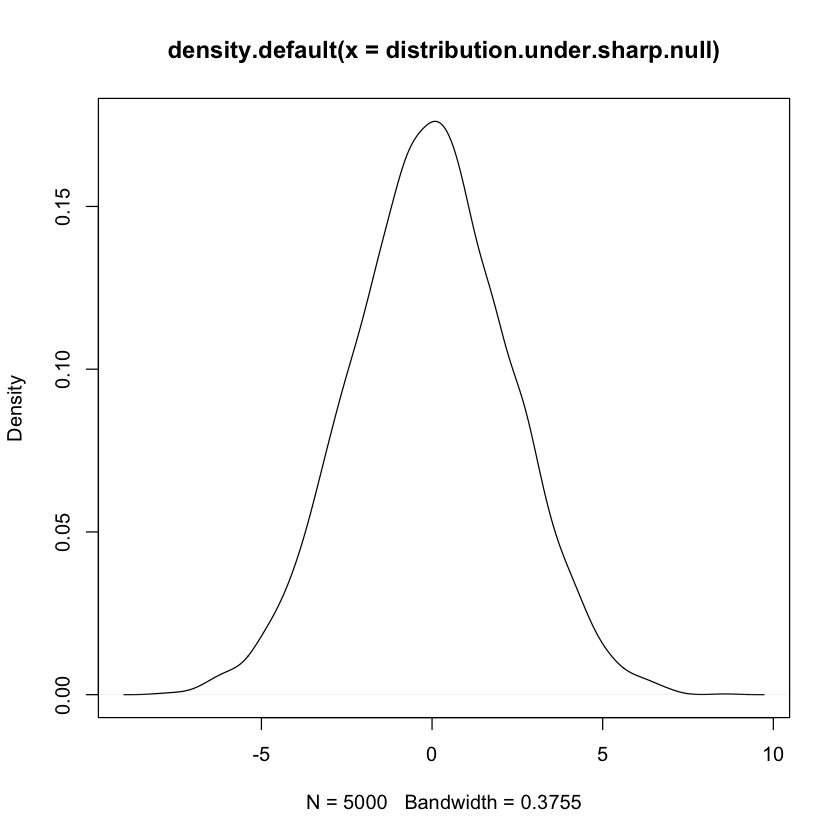

In [35]:
#Do this 5,000 to get a sense of the distribution
distribution.under.sharp.null <- replicate(5000, est.ate(outcomes,
randomize()))
plot(density(distribution.under.sharp.null)) #It's likely we get some differences by chance. This is a sampling distribution.

[1] 0.1046

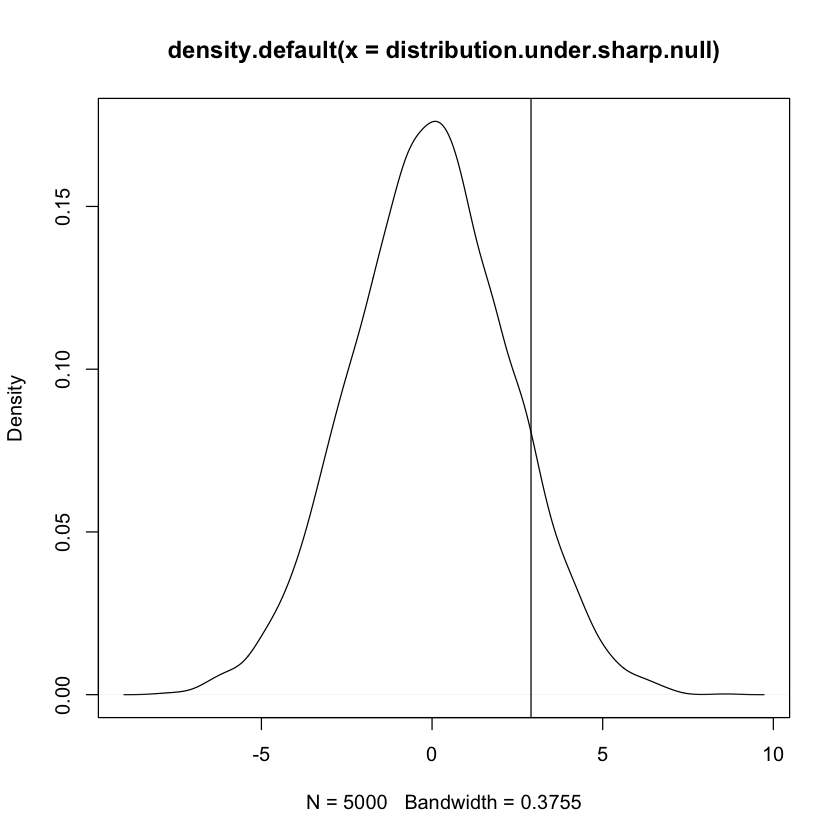

In [36]:
#How big was our observed difference?
plot(density(distribution.under.sharp.null))
abline(v=ate) #pretty similar to one we'd get by chance
mean(ate <= distribution.under.sharp.null) #p-value